<a href="https://colab.research.google.com/github/Katbut/Libraries/blob/Katbut-patch-2/WithoutTeacherHW_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание 1. 



In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse

from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#загрузка датасета
from sklearn.datasets import load_boston
boston = load_boston()

In [53]:

boston.keys()


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [54]:
#создание датафреймa x y

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
X.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [56]:
#разделение выборок на тестовую и тренировочную

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test,=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((404, 13), (102, 13), (404, 1), (102, 1))

In [57]:
X_test.describe

<bound method NDFrame.describe of          CRIM    ZN  INDUS  CHAS    NOX  ...   RAD    TAX  PTRATIO       B  LSTAT
173   0.09178   0.0   4.05   0.0  0.510  ...   5.0  296.0     16.6  395.50   9.04
274   0.05644  40.0   6.41   1.0  0.447  ...   4.0  254.0     17.6  396.90   3.53
491   0.10574   0.0  27.74   0.0  0.609  ...   4.0  711.0     20.1  390.11  18.07
72    0.09164   0.0  10.81   0.0  0.413  ...   4.0  305.0     19.2  390.91   5.52
452   5.09017   0.0  18.10   0.0  0.713  ...  24.0  666.0     20.2  385.09  17.27
..        ...   ...    ...   ...    ...  ...   ...    ...      ...     ...    ...
412  18.81100   0.0  18.10   0.0  0.597  ...  24.0  666.0     20.2   28.79  34.37
436  14.42080   0.0  18.10   0.0  0.740  ...  24.0  666.0     20.2   27.49  18.05
411  14.05070   0.0  18.10   0.0  0.597  ...  24.0  666.0     20.2   35.05  21.22
86    0.05188   0.0   4.49   0.0  0.449  ...   3.0  247.0     18.5  395.99  12.86
75    0.09512   0.0  12.83   0.0  0.437  ...   5.0  398.0     18

In [58]:
X_train.describe

<bound method NDFrame.describe of          CRIM    ZN  INDUS  CHAS     NOX  ...   RAD    TAX  PTRATIO       B  LSTAT
477  15.02340   0.0  18.10   0.0  0.6140  ...  24.0  666.0     20.2  349.48  24.91
15    0.62739   0.0   8.14   0.0  0.5380  ...   4.0  307.0     21.0  395.62   8.47
332   0.03466  35.0   6.06   0.0  0.4379  ...   1.0  304.0     16.9  362.25   7.83
423   7.05042   0.0  18.10   0.0  0.6140  ...  24.0  666.0     20.2    2.52  23.29
19    0.72580   0.0   8.14   0.0  0.5380  ...   4.0  307.0     21.0  390.95  11.28
..        ...   ...    ...   ...     ...  ...   ...    ...      ...     ...    ...
106   0.17120   0.0   8.56   0.0  0.5200  ...   5.0  384.0     20.9  395.67  18.66
270   0.29916  20.0   6.96   0.0  0.4640  ...   3.0  223.0     18.6  388.65  13.00
348   0.01501  80.0   2.01   0.0  0.4350  ...   4.0  280.0     17.0  390.94   5.99
435  11.16040   0.0  18.10   0.0  0.7400  ...  24.0  666.0     20.2  109.85  23.27
102   0.22876   0.0   8.56   0.0  0.5200  ...   5.0  

In [59]:
#Масштабирование данных

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

colnames = X.columns
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=colnames)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=colnames)

X_train_scaled.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.50032,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.50032,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474


In [60]:
X_train_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,-1.842585e-16,5.056461e-17,3.074548e-15,-5.056461e-17,-5.221483e-15,-4.031016e-15,-1.001124e-15,-3.176777e-16,-3.654942e-17,-1.534457e-16,2.005876e-14,5.754473e-15,-1.853578e-16
std,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-4.061414e-01,-5.003201e-01,-1.487791e+00,-2.780887e-01,-1.458711e+00,-3.461733e+00,-2.348206e+00,-1.258391e+00,-9.740476e-01,-1.307684e+00,-2.568944e+00,-3.892249e+00,-1.510559e+00
25%,-3.979761e-01,-5.003201e-01,-8.502733e-01,-2.780887e-01,-8.887828e-01,-6.003488e-01,-8.228264e-01,-8.081981e-01,-6.243599e-01,-7.533563e-01,-6.821011e-01,2.098797e-01,-8.005057e-01
50%,-3.776748e-01,-5.003201e-01,-3.521669e-01,-2.780887e-01,-1.572334e-01,-1.494427e-01,3.270201e-01,-2.971196e-01,-5.077973e-01,-4.460660e-01,1.714705e-01,3.830012e-01,-2.157763e-01
75%,-4.582119e-02,3.645893e-01,1.033237e+00,-2.780887e-01,6.338607e-01,4.528240e-01,8.974727e-01,7.481981e-01,3.081406e-01,1.578434e+00,8.453428e-01,4.316600e-01,5.513070e-01
max,9.630689e+00,3.824227e+00,2.433163e+00,3.595975e+00,2.675394e+00,3.477564e+00,1.124581e+00,3.907900e+00,1.706891e+00,1.849573e+00,1.653990e+00,4.441800e-01,3.592534e+00


In [61]:
#создание  TSNE

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_scaled.shape



(404, 13)

In [62]:
X_train_tsne.shape

(404, 2)

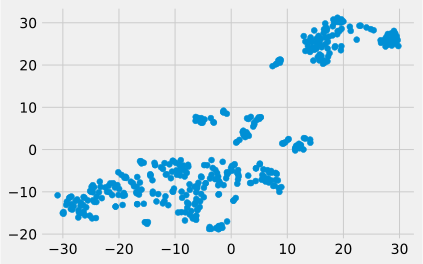

In [63]:
plt.style.use('fivethirtyeight')

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()


Задание 2. 

In [41]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)

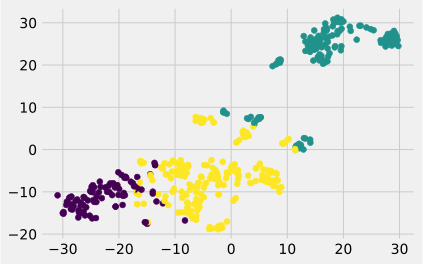

In [42]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()


In [64]:
#Вычислите средние значения price и CRIM в разных кластерах.

print('Средние значения CRIM:')
print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))


Средние значения CRIM:
Кластер 0: 0.07356558139534886
Кластер 1: 10.797028425196853
Кластер 2: 0.42166020942408367


In [65]:
print('Средние значения price:')
print('Кластер 0: {}'.format(Y_train[labels_train == 0].mean()))
print('Кластер 1: {}'.format(Y_train[labels_train == 1].mean()))
print('Кластер 2: {}'.format(Y_train[labels_train == 2].mean()))

Средние значения price:
Кластер 0: price    27.788372
dtype: float64
Кластер 1: price    16.165354
dtype: float64
Кластер 2: price    24.958115
dtype: float64


Задание 3

In [66]:
#Примените модели KMeans, построенной в предыдущем задании, к данным из тестового набора
labels_test = kmeans.predict(X_test_scaled)


In [68]:
#Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.
print('Средние значения price:')
print('Кластер 0: {}'.format(Y_test[labels_test == 0].mean()))
print('Кластер 1: {}'.format(Y_test[labels_test == 1].mean()))
print('Кластер 2: {}'.format(Y_test[labels_test == 2].mean()))
print('Средние значения CRIM:')
print('Кластер 0: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

Средние значения price:
Кластер 0: price    28.413636
dtype: float64
Кластер 1: price    16.437143
dtype: float64
Кластер 2: price    22.031111
dtype: float64
Средние значения CRIM:
Кластер 0: 0.07985181818181818
Кластер 1: 10.165531142857143
Кластер 2: 0.2845831111111111
